# **Milestone 1**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
  * Reduce the chance of non-performing loans by improving customer scrutiny through customer analysis.

**The objectives:** What is the intended goal?<br>
  * Build a classification model to predict clients who are likely to default on their loan and give recommendations to the bank on the important features to consider while approving a loan.

**The key questions:** What are the key questions that need to be answered?<br>
  * Find a predict clients who are likely to default on their loan.

**The problem formulation:** What is it that we are trying to solve using data science?
  * Through the analysis of data, we can determine which type of customer group has a higher probability of defaulting on loans, and use algorithms to help banks determine whether to apply for loans to such customers.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Import the necessary libraries**

In [1]:
from google.colab import files

uploaded = files.upload()

Saving hmeq.csv to hmeq.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [4]:
hm = pd.read_csv("/content/hmeq.csv")

# Copying data to another variable to avoid any changes to original data
data = hm.copy()



### **Print the first and last 5 rows of the dataset**

In [5]:
# Display first five rows
# Remove ___________ and complete the code

data.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [6]:
# Display last 5 rows
# Remove ___________ and complete the code
data.tail(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [7]:
# Check the shape of the data
# Remove ___________ and complete the code

data.shape

(5960, 13)

**Observations**

* We can observe that there are 5960 observations and 13 columns in the dataset.

### **Check the data types of the columns**

In [8]:
# Check info of the data
# Remove ___________ and complete the code
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observations**

* We can observe that not all of columns have 5960 rows, which means there are some variables are same.
* Most of data type is float64.

### **Check for missing values**

In [9]:
# Analyse missing values - Hint: use isnull() function
# Remove ___________ and complete the code
missing_value = data.isnull().sum()
print(missing_value)

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [10]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset
# Remove ___________ and complete the code

percent_missing = missing_value * 100 / len(data)
percent_missing

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Observations**

* We can observe that "DEBTING" has high precentage of missing values, which means there are a lot of values are same in this column.
* The second high precentage of missing values are DEROG, which has 11.879195.

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [11]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

cols

['REASON', 'JOB', 'BAD']

In [12]:
# Changing the data type of object type column to category. hint use astype() function
# remove ___________ and complete the code

for i in cols:
    data[i] = data[i].astype('category')

In [13]:
# Checking the info again and the datatype of different variable
# remove ___________ and complete the code

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [14]:
# Analyze the summary statistics for numerical variables
# Remove ___________ and complete the code

data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Observations**

We can observe that 
* The average LOAN is around 18607, the range of LOAN is between 1100 to 89900.
* The average MORTDUE is around 73760, the range of MORTDUE is between 2063 to 399550.
* The average VALUE is around 101776, the range of MORTDUE is between 8000 to 855909.
* The average YOJ is around 9, the range of MORTDUE is between 0 to 41.
* The average DEROG is around 0.25, the range of MORTDUE is between 0 to 10.
* The average DELINQ is around 0.44, the range of MORTDUE is between 0 to 15.

In [15]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
# Remove ___________ and complete the code

data.describe(include = ['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Observations**

* We can observe, in the count BAD has 5960 rows, REASON has 5708 rows, JOB has 5681 rows. The shape of this dataset has 5960 rows, so REASON and JOB columns have some dupelicated values.


**Let's look at the unique values in all the categorical variables**

In [16]:
# Checking the count of unique values in each categorical column 
# Remove ___________ and complete the code

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in BAD are :
0    4771
1    1189
Name: BAD, dtype: int64
**************************************************
Unique values in REASON are :
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
**************************************************
Unique values in JOB are :
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
**************************************************


**Observations**

* We can observe that in BAD column, there are only two kind of values, 1 and 0.
* In the column REASON, there are only two kind of values, DebtCon and HomeImp.
* In the Job column, there are 6 objects, Mgr, Office, Other, ProfExe, Sales, and Self.

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

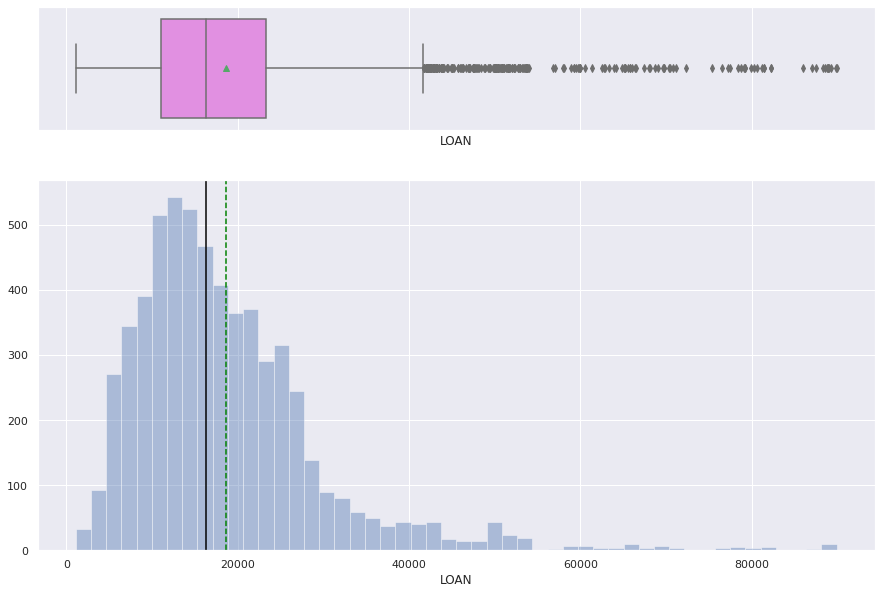

In [18]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Observations**

* We can observe from LOAN, there are a lot of outliers and right skewer.
* We can see that median and mean from LOAN are on the right side of the highest value and has a downward trend.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

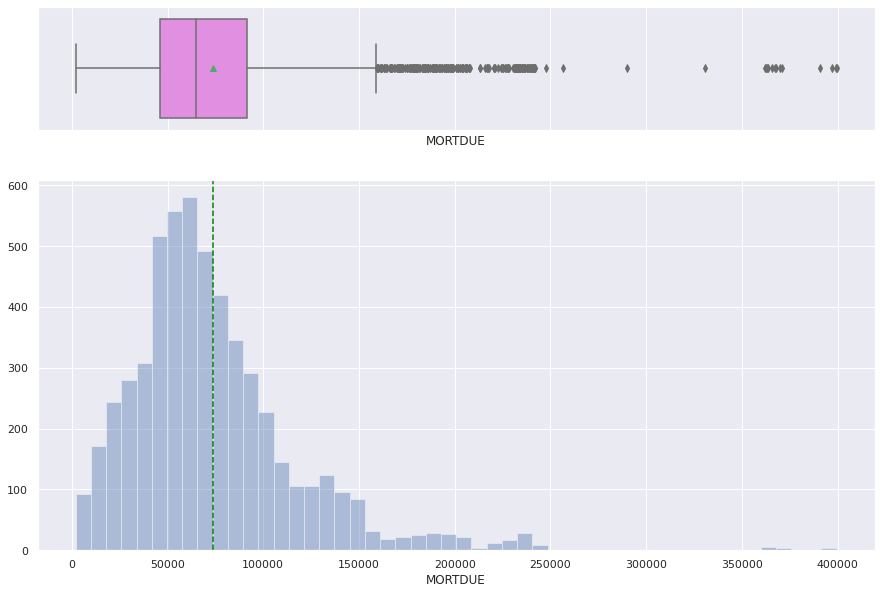

In [19]:
histogram_boxplot(data['MORTDUE'])

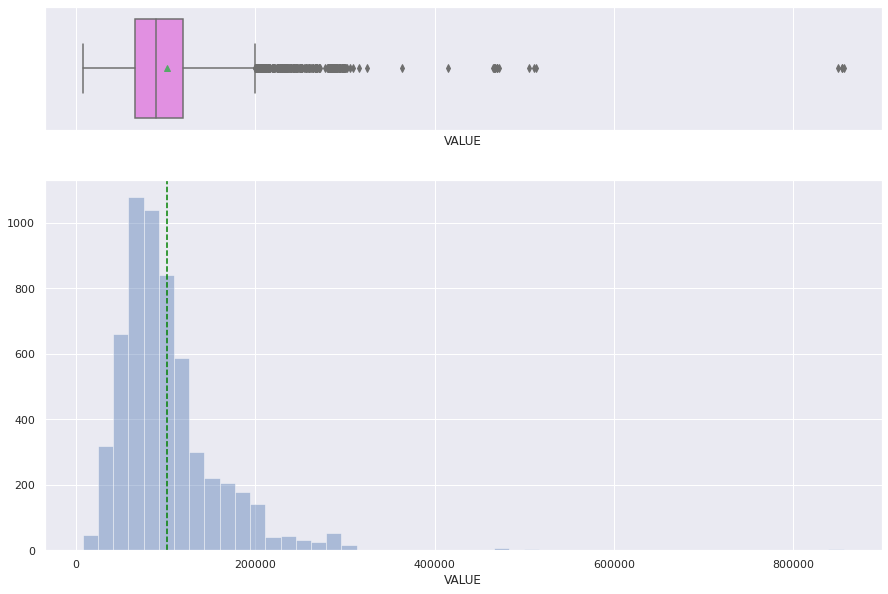

In [20]:
histogram_boxplot(data['VALUE'])

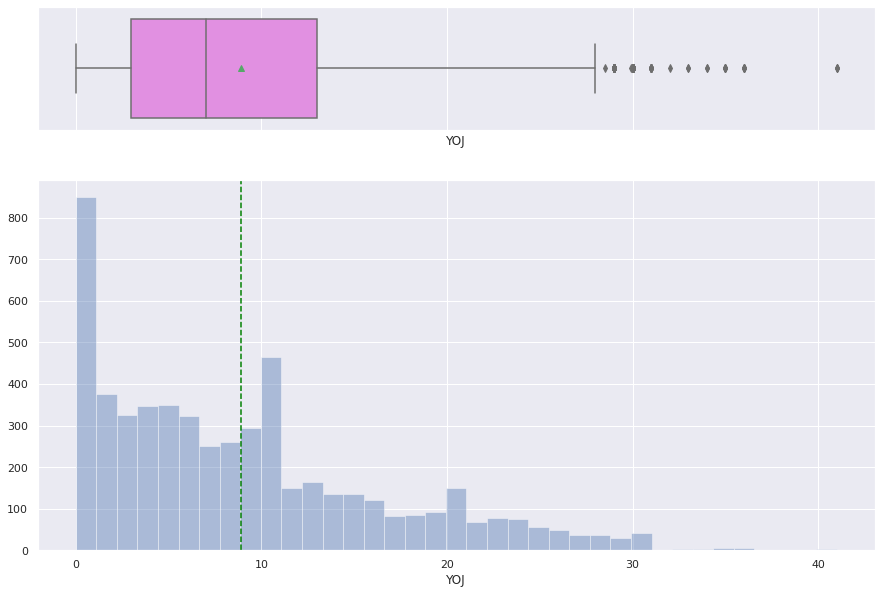

In [21]:
histogram_boxplot(data['YOJ'])

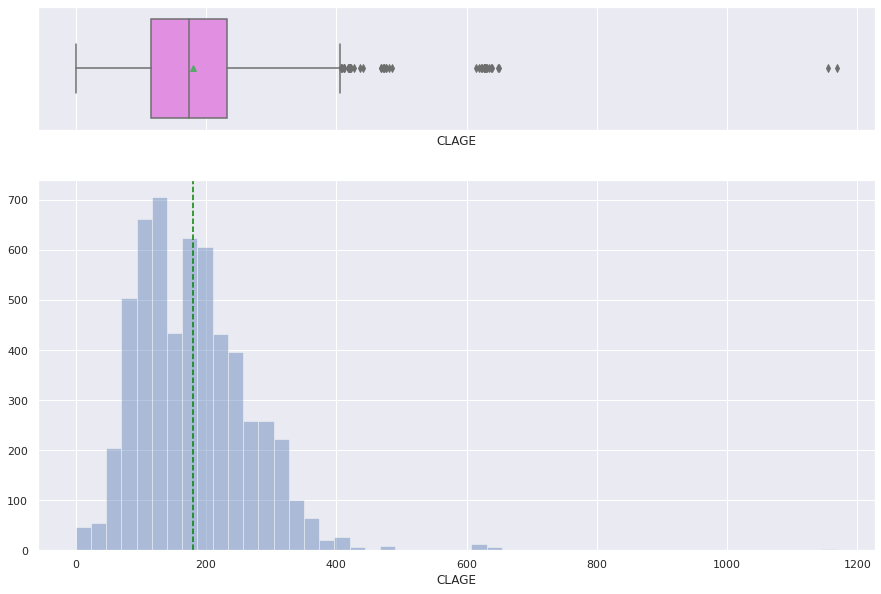

In [22]:
histogram_boxplot(data['CLAGE'])

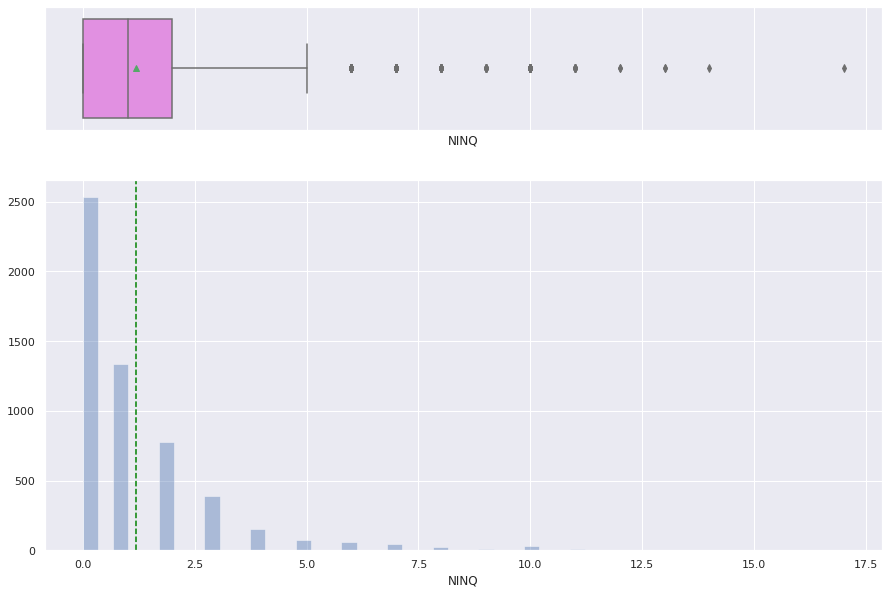

In [23]:
histogram_boxplot(data['NINQ'])

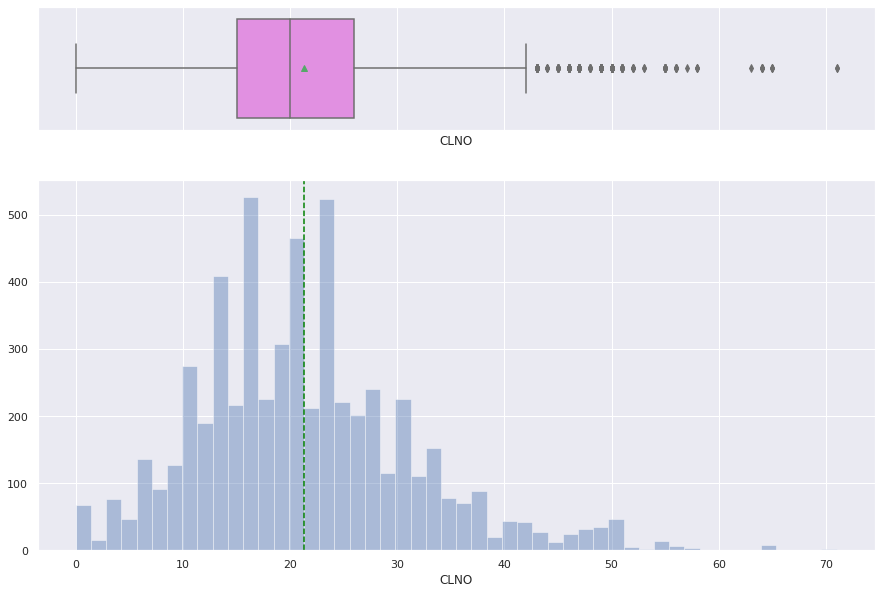

In [24]:
histogram_boxplot(data['CLNO'])

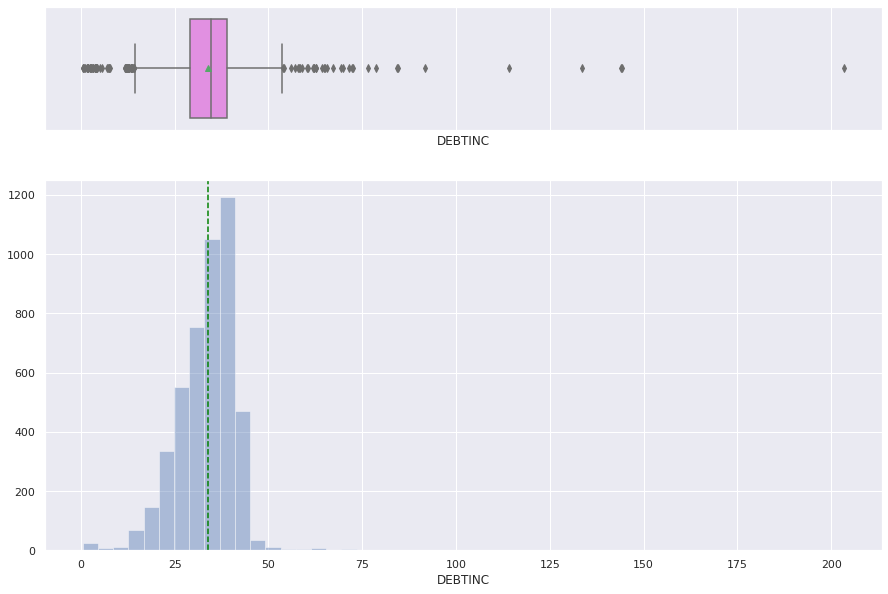

In [25]:
histogram_boxplot(data['DEBTINC'])

**Observations**

* We can observe that all columns have outliers, and DEBTINC has outliers at left and right.
* All columns' skewer are right side, except DEBTINC. 

### **2. Univariate Analysis - Categorical Data**

In [26]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

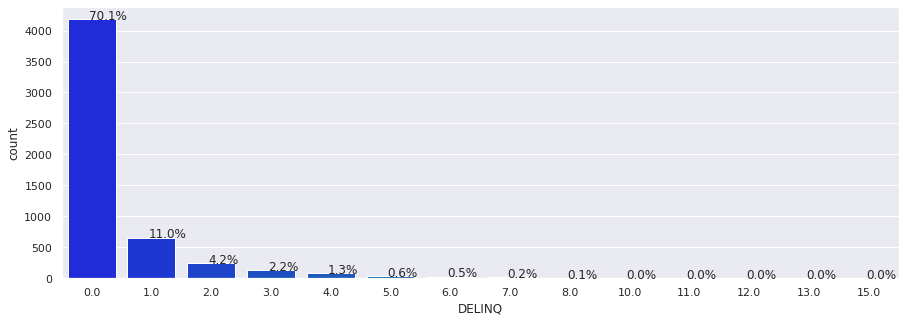

In [27]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Observations**

* We can observe that the vast majority of people pay their payment due on time, and 70% of them have no problem with payment due, but a small number of people pay off their payment due after the repayment date. .

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

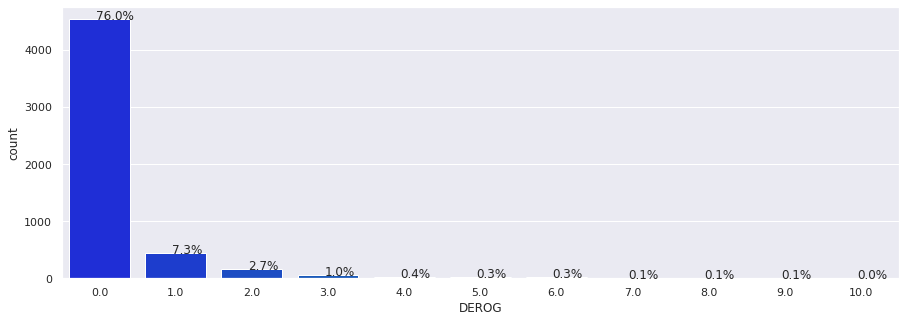

In [28]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

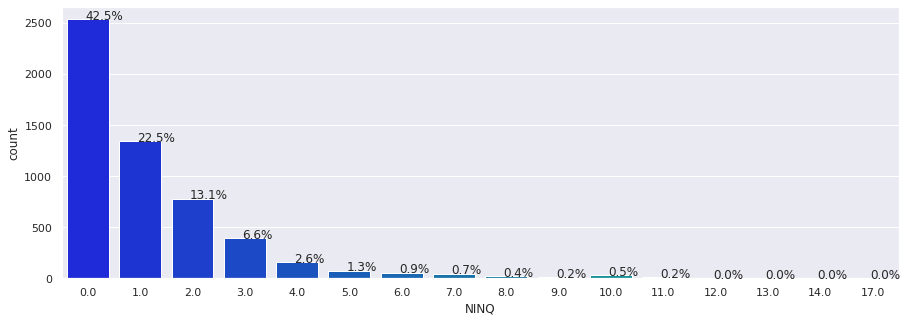

In [29]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["NINQ"],palette='winter')
perc_on_bar(ax,data["NINQ"])

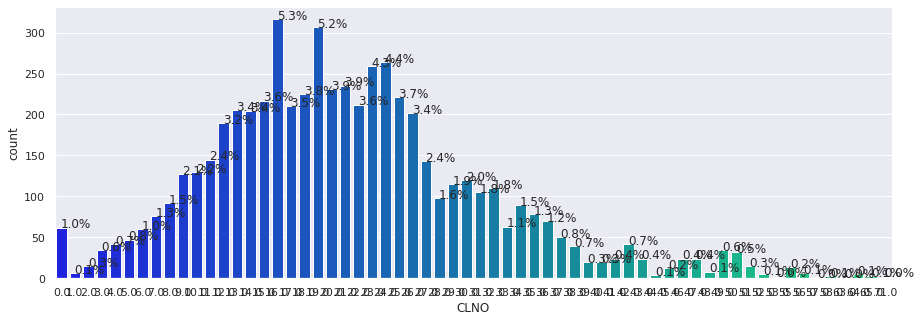

In [30]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["CLNO"],palette='winter')
perc_on_bar(ax,data["CLNO"])

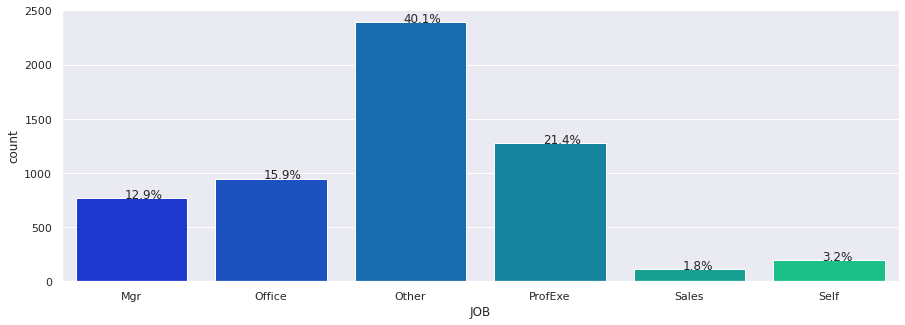

In [31]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

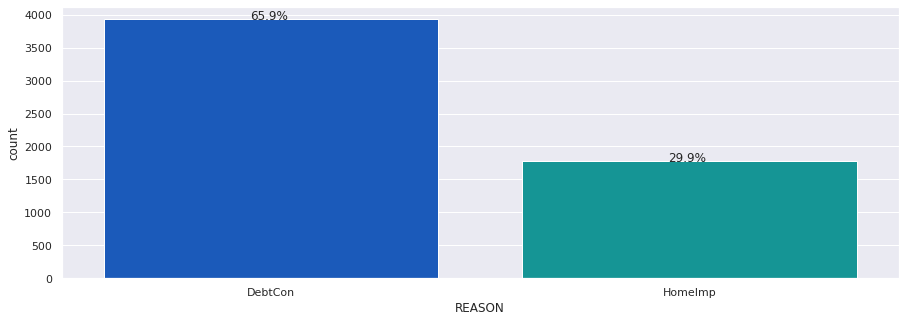

In [32]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

**Observations**

* We observed that most of the job types of loan applicants are Other, and most applicants do not provide what specific job is. The second is the majority of people from ProfExe and Office.
* Those who have never checked their own credit check and those who have checked it only once are in the majority.
* DebtCon was the reason most people borrowed at 65.9%, while HomeImp was the reason for borrowing at only 29.9%.

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

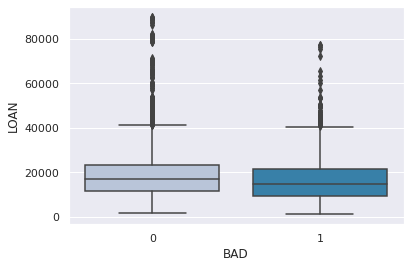

In [33]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

**Observations**

* The median of 0 and 1 are lower than 20000.
* The largest number of 0 is around 40000, which is simular than 1.

####**Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

### **Bivariate Analysis: Two Continuous Variables**

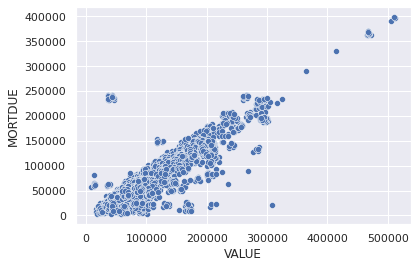

In [34]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Observations**

* We can find that the lower the current value of the property, the lower the amount due on the existing mortgage.

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

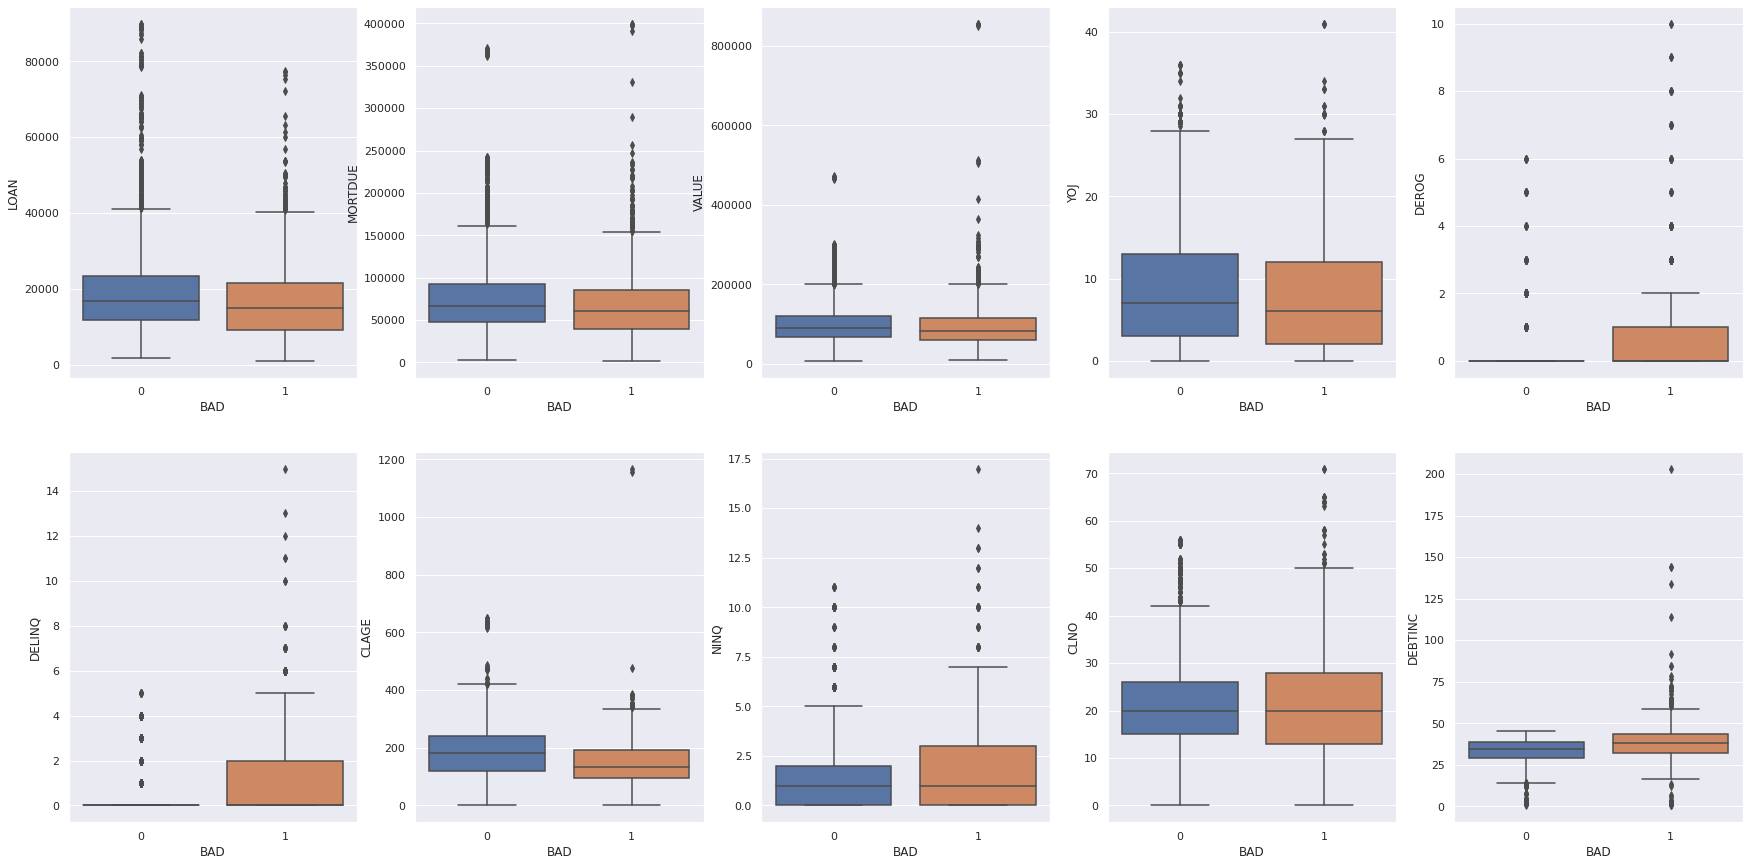

In [35]:
fig, ax = plt.subplots(2,5, figsize=(30,15))
row_1 = ['LOAN','MORTDUE','VALUE','YOJ','DEROG']
row_2 = ['DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
row_3 = []
for i, col in enumerate(row_1):
    sns.boxplot(x=data['BAD'], y=data[col], ax=ax[0,i])
for i, col in enumerate(row_2):
    sns.boxplot(x=data['BAD'], y=data[col], ax=ax[1,i])

**Observations**

* To verify the existence of bias, we chose the graphical illustration of numerical and categorical variables distributed by the response variable "BAD", which showed that in the case of numerical variables, except for "DEROG" and "DELINQ", they were well distributed.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [36]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


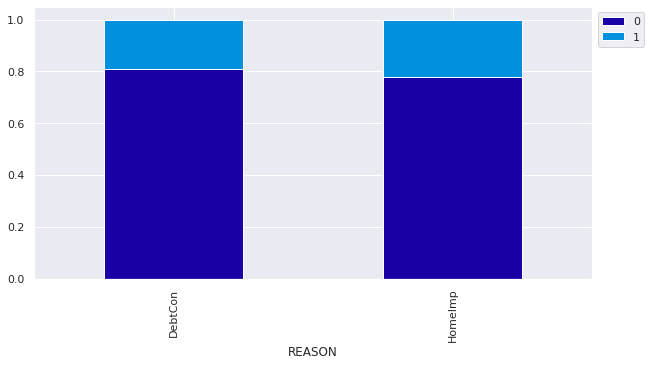

In [37]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Observations**

* We can observe that although the number of people who use DebtCon as the main reason for borrowing is more than the total number of people who use HomeImp as the reason for borrowing, the difference in the proportion of delinquent loans is not large.

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


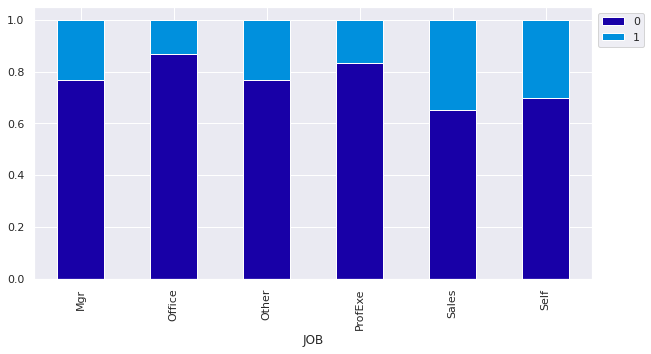

In [38]:
stacked_plot(data['JOB'])

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
------------------------------------------------------------------------------------------------------------------------


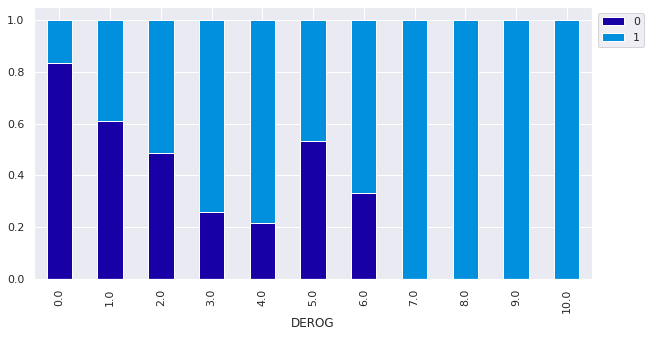

In [39]:
stacked_plot(data['DEROG'])

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
------------------------------------------------------------------------------------------------------------------------


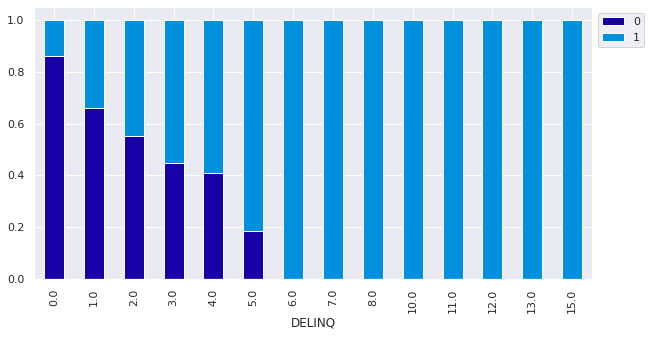

In [40]:
stacked_plot(data['DELINQ'])

**Observations**

* We can observe from the job type and BAD comparison, Sales and Self customers have more serious loan delinquency problems than other job categories.

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

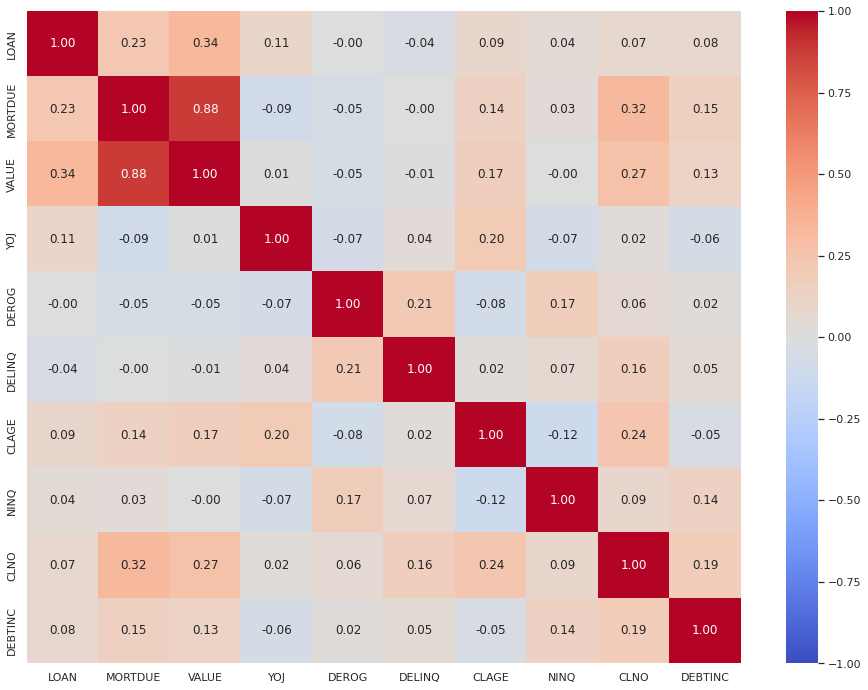

In [179]:
# Separating numerical variables
numerical_col = data.select_dtypes(include = np.number).columns.tolist()

# Build correlation matrix for numerical columns
# Remove ___________ and complete the code

corr = data[numerical_col].corr()

# plot the heatmap
# Remove ___________ and complete the code

plt.figure(figsize=(16,12))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmax = 1, vmin = -1,
        fmt = ".2f",
        xticklabels = corr.columns,
        yticklabels = corr.columns);

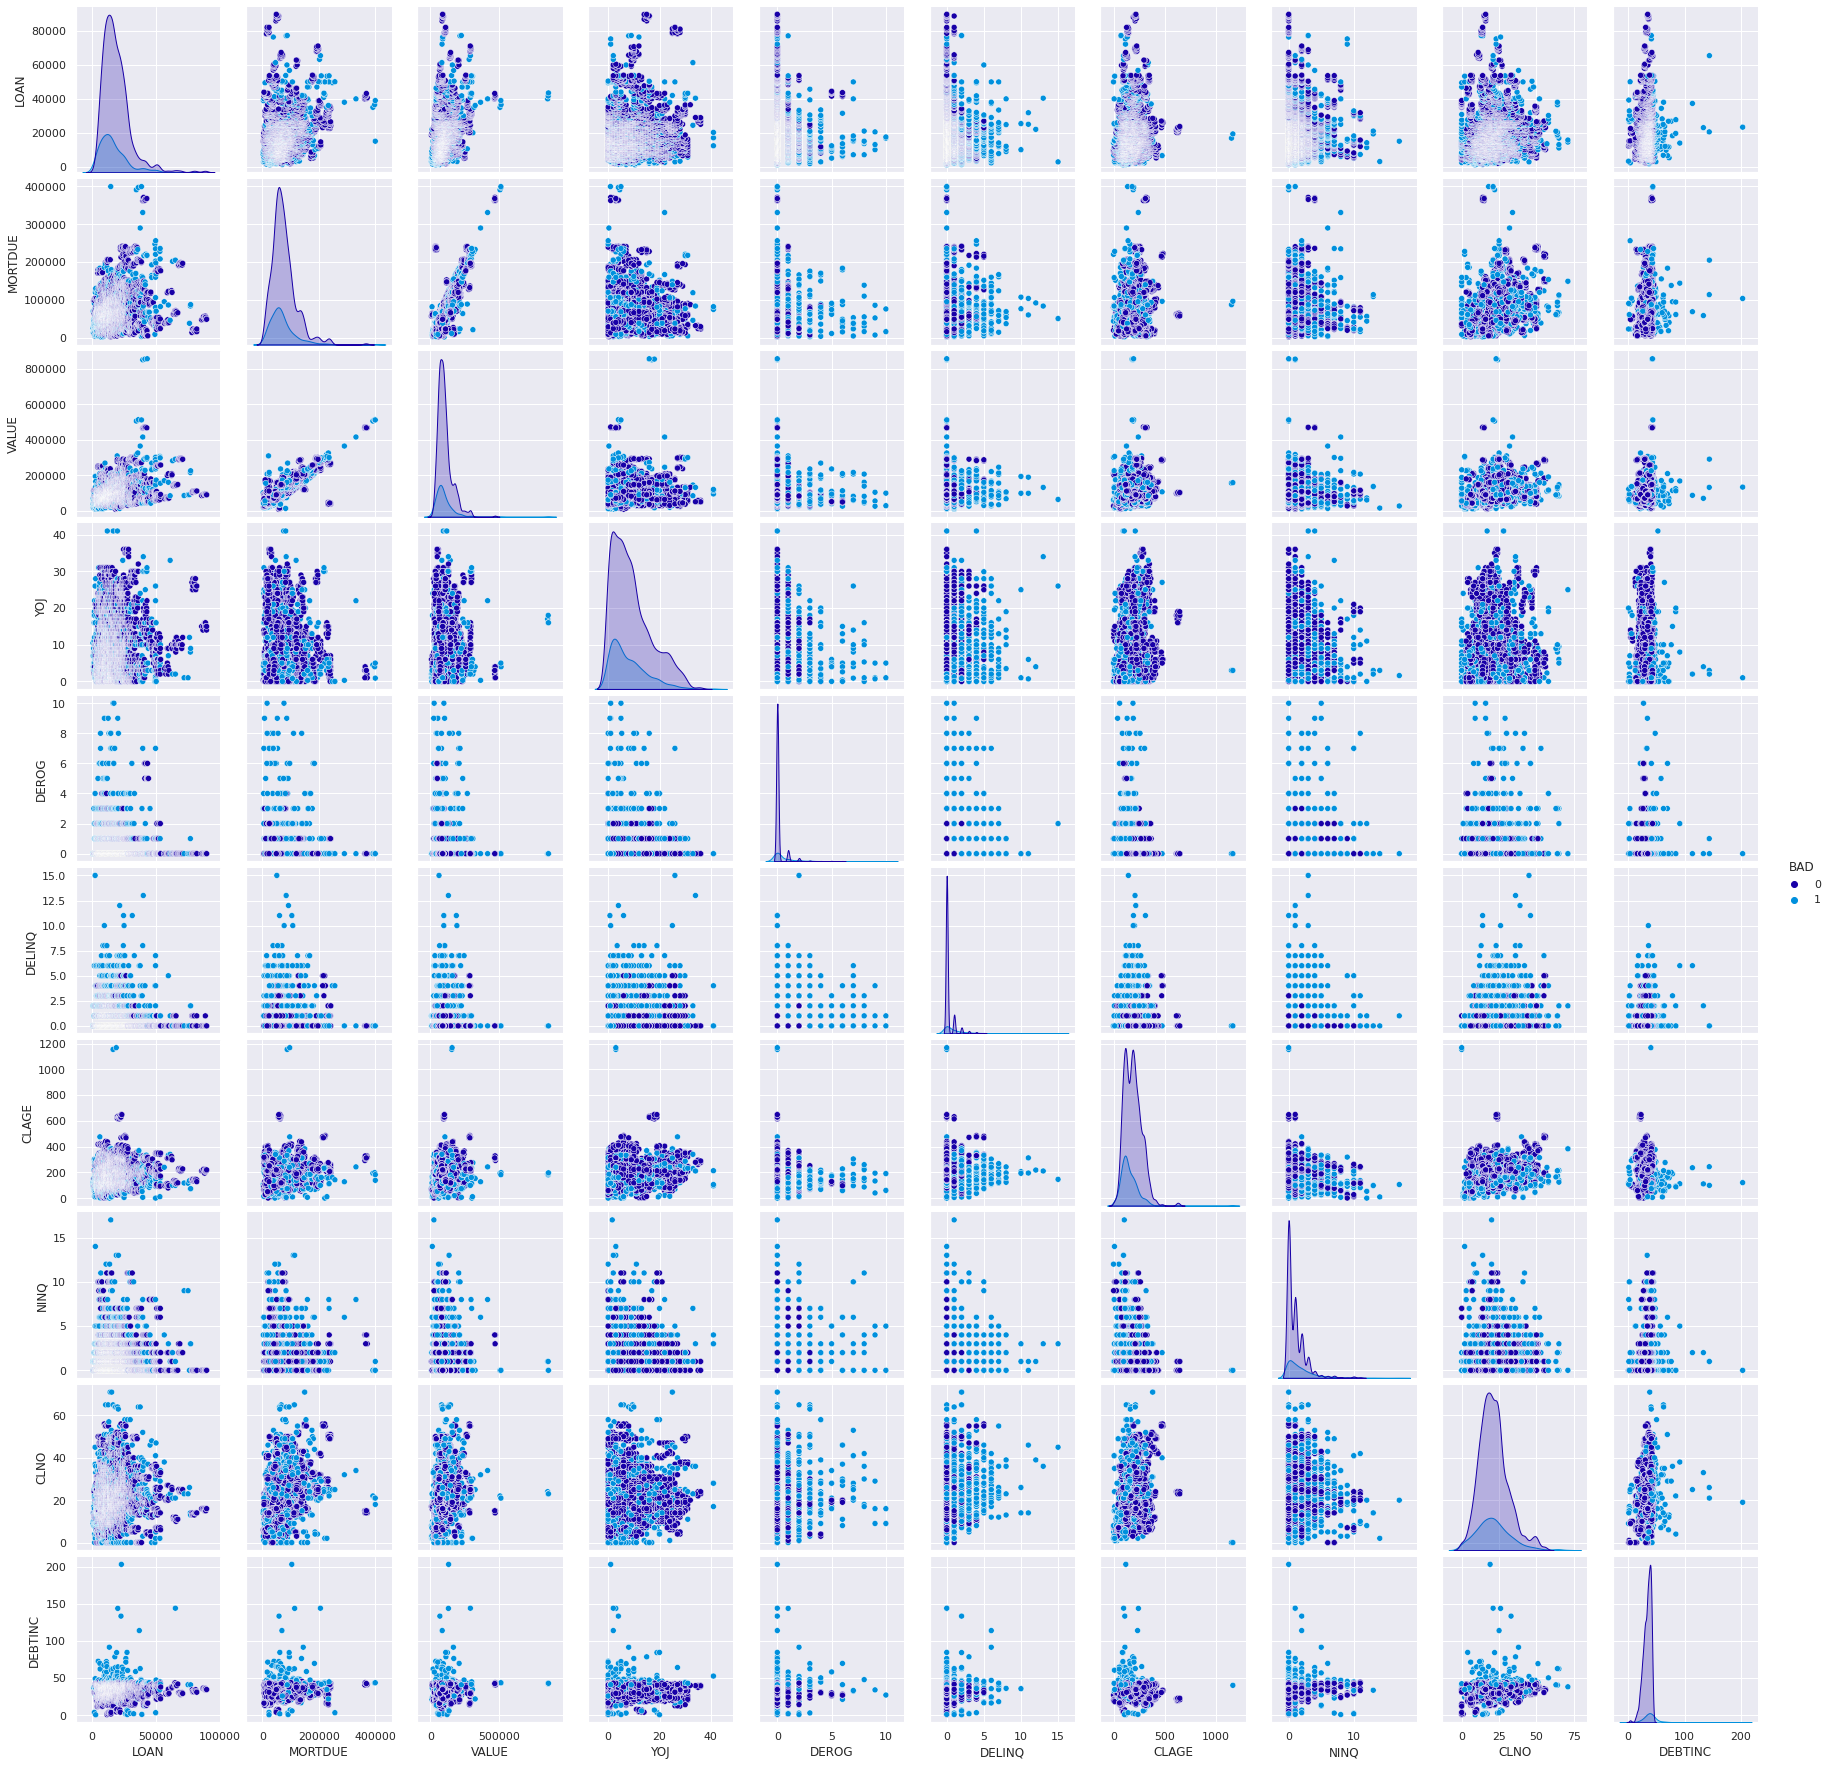

In [42]:
# Build pairplot for the data with hue = 'BAD'
# Remove ___________ and complete the code
sns.pairplot(data, hue = "BAD")

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

In [41]:
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


#### Treating Outliers

In [42]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1 = df[col].quantile(q = 0.25) # 25th quantile
    Q3 = df[col].quantile(q = 0.75)  # 75th quantile
    IQR = Q3 - Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5 * IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5 * IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [43]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw, numerical_col)

In [44]:
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [45]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,14.0,NaN
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600.0,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,41600.0,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,41600.0,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,41600.0,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


#### Adding new columns in the dataset for each column which has missing values 

In [46]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [47]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

In [48]:
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [49]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,True
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600.0,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,...,False,False,False,False,False,False,False,False,False,False
5956,0,41600.0,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,...,False,False,False,False,False,False,False,False,False,False
5957,0,41600.0,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,...,False,False,False,False,False,False,False,False,False,False
5958,0,41600.0,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,...,False,False,False,False,False,False,False,False,False,False


#### Filling missing values in numerical columns with median and mode in categorical variables

In [50]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
df[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [51]:
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [52]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500.0,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600.0,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,...,False,False,False,False,False,False,False,False,False,False
5956,0,41600.0,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,...,False,False,False,False,False,False,False,False,False,False
5957,0,41600.0,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,...,False,False,False,False,False,False,False,False,False,False
5958,0,41600.0,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,...,False,False,False,False,False,False,False,False,False,False


## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?
  * Data Preparation for modeling
  * Building Classification Model
  * Decision Tree
  * Decision Tree - Hyperparameter Tuning
  * Random Forest Classifier
  * Random Forest Classifier - Hyperparameter Tuning

**2. Overall solution design** - What is the potential solution design?
  * 
  

**3. Measures of success** - What are the key measures of success?
  * Through the analysis of BAD and other objects, determine what type of work or reasons will cause customers to default on loans.

  * The current value of the property and the maturity of the existing mortgage are used to determine whether it is worth taking as collateral.

# **Milestone 2**

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

### **Separating the target variable from other variables**

In [53]:
df.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500.0,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True


In [54]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = df.drop(['BAD'], axis = 1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)
y = df['BAD']

### **Separating the target variable from other variables**

In [55]:
# Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

print(x_train.shape, x_test.shape)

(4172, 27) (1788, 27)


### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [56]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [57]:
# Defining the Logistic regression model
logreg = LogisticRegression(solver = 'newton-cg')

# Fitting the model on the training data 
logreg.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3340
           1       0.71      0.58      0.64       832

    accuracy                           0.87      4172
   macro avg       0.81      0.76      0.78      4172
weighted avg       0.86      0.87      0.86      4172



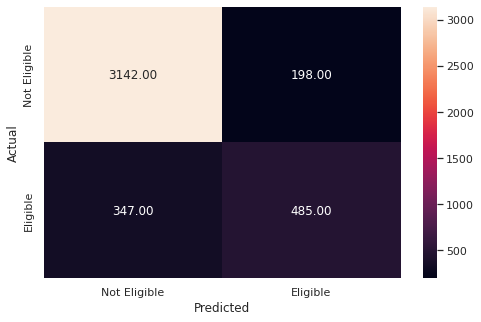

In [58]:
#Predict for train set
pred_train = logreg.predict(x_train)

#checking the performance on the train dataset
metrics_score(y_train, pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1431
           1       0.74      0.57      0.64       357

    accuracy                           0.87      1788
   macro avg       0.82      0.76      0.78      1788
weighted avg       0.87      0.87      0.87      1788



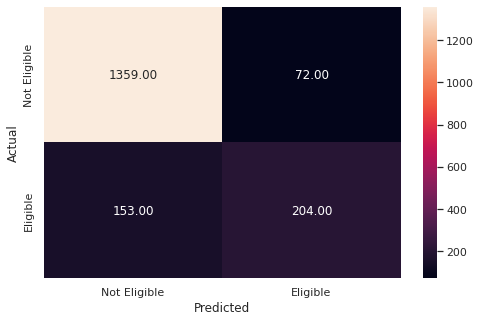

In [59]:
#Predict for test set
pred_test = logreg.predict(x_test)

#checking the performance on the test dataset
metrics_score(y_test, pred_test)

**Observations: __________**

* The proformance of train and test data in logistic regression models are very effecient, they are with the recall of 0.96 and 0.97.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [60]:
# Printing the coefficients of logistic regression
pd.Series(logreg.coef_[0], index = x_train.columns).sort_values(ascending = False)

VALUE_missing_values_flag      3.453075
DEBTINC_missing_values_flag    2.704397
CLNO_missing_values_flag       1.146512
CLAGE_missing_values_flag      1.095262
JOB_Sales                      0.537813
MORTDUE_missing_values_flag    0.487293
REASON_HomeImp                 0.229050
JOB_Self                       0.200389
NINQ                           0.144182
DEBTINC                        0.083375
REASON_missing_values_flag     0.051020
CLNO                           0.006498
VALUE                          0.000001
DEROG                          0.000000
DELINQ                         0.000000
MORTDUE                       -0.000005
LOAN                          -0.000009
CLAGE                         -0.005967
YOJ                           -0.022788
NINQ_missing_values_flag      -0.050985
JOB_Other                     -0.183553
JOB_ProfExe                   -0.473874
JOB_Office                    -0.653801
YOJ_missing_values_flag       -0.766107
DEROG_missing_values_flag     -0.801211


**Insights ________**

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model

In [61]:
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [62]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)
    

In [63]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

#### Separating the target variable y and independent variable x

In [64]:
# Drop dependent variable from dataframe and create the X(i ndependent variable) matrix
x = data.drop(columns = 'BAD', axis = 1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
x = pd.get_dummies(x, drop_first = True)

# Create y(dependent varibale)
y = data['BAD']

#### Split the data

In [65]:
# Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) 

In [66]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
d_tree =  DecisionTreeClassifier(class_weight = {0:0.2, 1:0.8})

In [67]:
#fitting Decision tree model
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



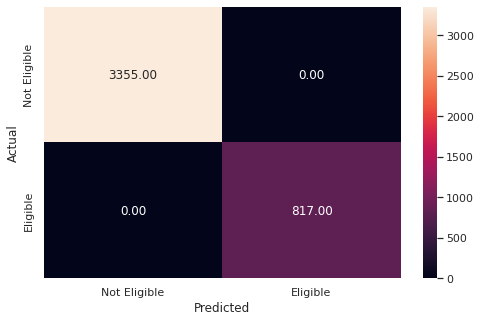

In [68]:
# Checking performance on the training data
pred_train_2 = d_tree.predict(x_train)

metrics_score(y_train, pred_train_2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1416
           1       0.69      0.61      0.65       372

    accuracy                           0.86      1788
   macro avg       0.79      0.77      0.78      1788
weighted avg       0.86      0.86      0.86      1788



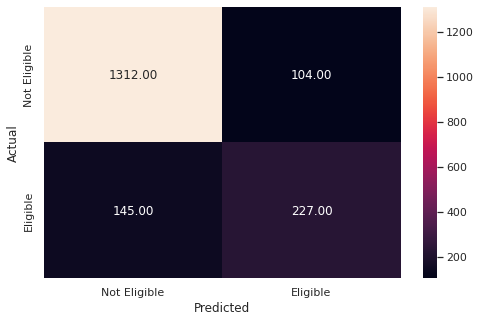

In [69]:
# Checking performance on the testing data
pred_test_2 = d_tree.predict(x_test)

metrics_score(y_test, pred_test_2)

**Insights _____________**

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [70]:
# Choose the type of classifier. 
# Remove _________ and complete the code
d_tree_tuned = DecisionTreeClassifier(class_weight={0:0.2, 1:0.8}, random_state = 1)


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_depth': np.arange(2, 30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes': [2, 3, 5, 10, 15],
              'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]
             }


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(metrics.recall_score)


# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, n_jobs = -1)


# Fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(x_train, y_train)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
d_tree_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
d_tree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=10,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3355
           1       0.59      0.83      0.69       817

    accuracy                           0.85      4172
   macro avg       0.77      0.84      0.80      4172
weighted avg       0.88      0.85      0.86      4172



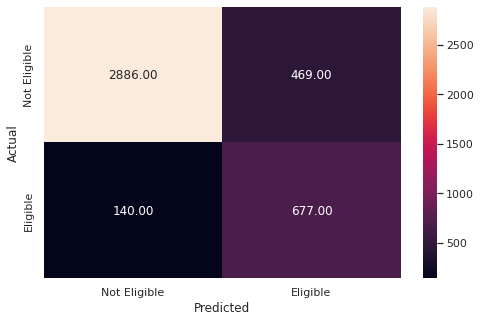

In [71]:
# Checking performance on the training data based on the tuned model
pred_train_3 = d_tree_tuned.predict(x_train)

metrics_score(y_train, pred_train_3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1416
           1       0.59      0.79      0.68       372

    accuracy                           0.84      1788
   macro avg       0.77      0.82      0.79      1788
weighted avg       0.87      0.84      0.85      1788



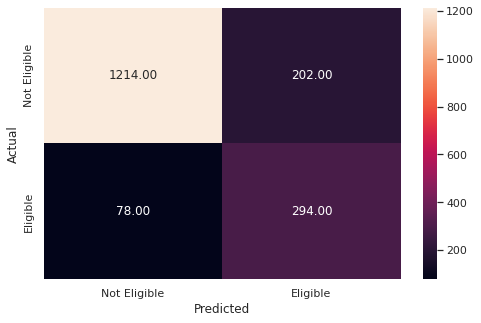

In [72]:
# Checking performance on the testing data based on the tuned model
pred_test_3 = d_tree_tuned.predict(x_test)

metrics_score(y_test, pred_test_3)

**Insights ___________**

* The performance on the training set has gone down just a little bit than base model.
* The data set is not overfitting.

#### Plotting the Decision Tree

In [93]:
print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
DEBTINC_missing_values_flag  0.622160
DEBTINC                      0.189722
DELINQ                       0.065782
CLAGE                        0.040752
MORTDUE                      0.018302
DEROG_missing_values_flag    0.013715
DEROG                        0.013365
CLNO                         0.013075
LOAN                         0.012811
YOJ                          0.010317
NINQ_missing_values_flag     0.000000
JOB_Other                    0.000000
JOB_Office                   0.000000
REASON_HomeImp               0.000000
JOB_ProfExe                  0.000000
JOB_Sales                    0.000000
CLNO_missing_values_flag     0.000000
JOB_missing_values_flag      0.000000
CLAGE_missing_values_flag    0.000000
DELINQ_missing_values_flag   0.000000
YOJ_missing_values_flag      0.000000
REASON_missing_values_flag   0.000000
VALUE_missing_values_flag    0.000000
MORTDUE_missing_values_flag  0.000000
NINQ                         0.000000
VALUE       

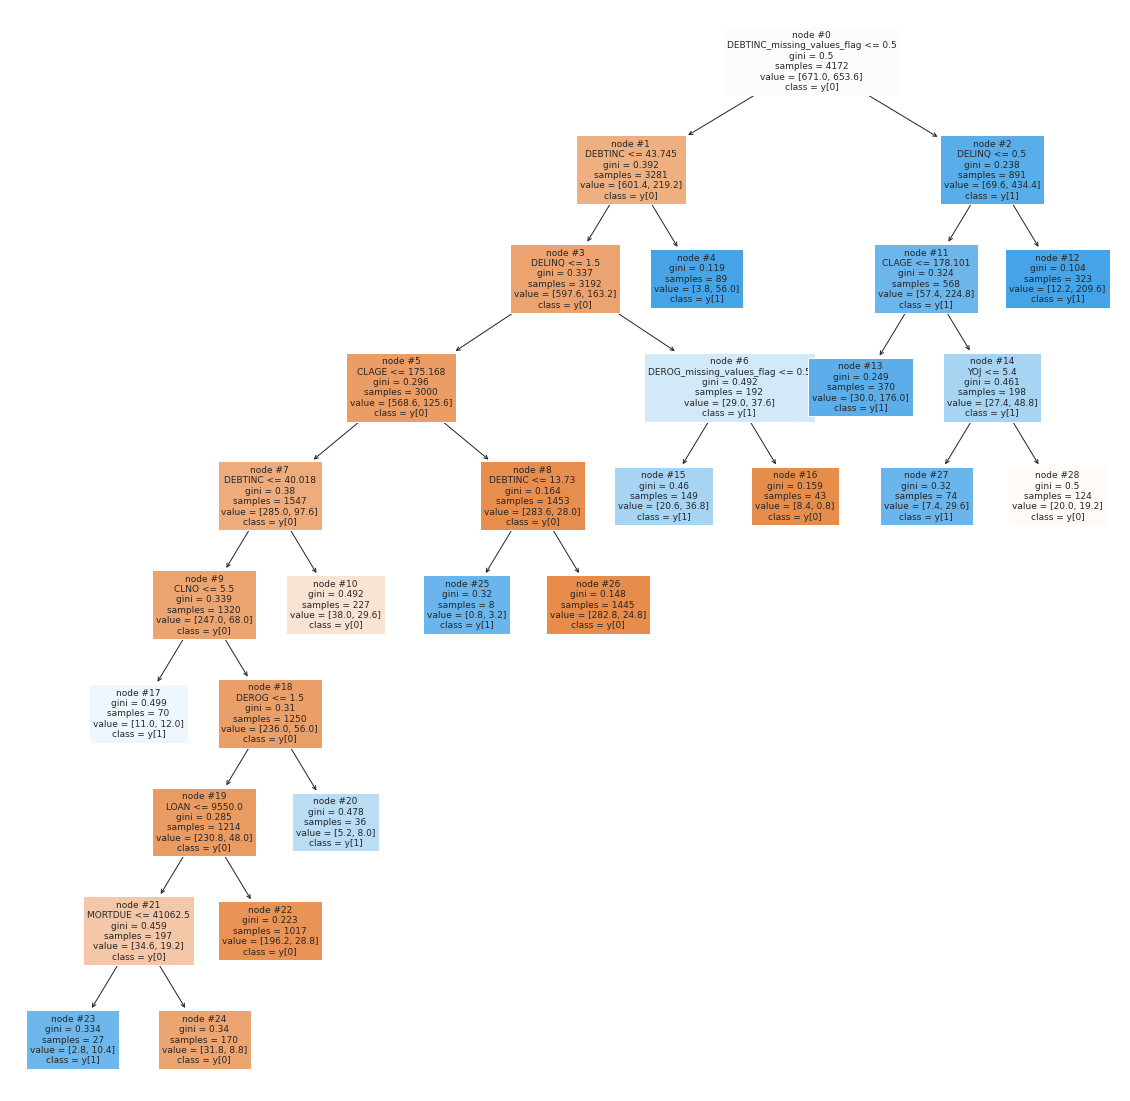

In [73]:
# Plot the decision  tree and analyze it to build the decision rule
# Remove _________ and complete the code

features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names=features, filled=True, fontsize=9, node_ids=True, class_names=True)

plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down: _____

* The most accurate and centain observation is that age of the oldest credit line in monthsis lower than 178.101 and the years at present job is lower than 0.05, these people are not centainly going to be paid for the loan.
* The Debt-to-income ratio is lower and equal to 43.709, these people are more likely to paid for the loan.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [74]:
# Defining Random forest CLassifier
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



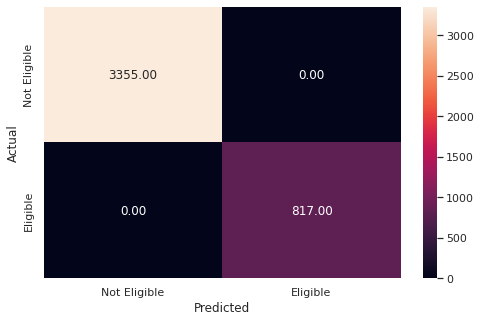

In [75]:
#Checking performance on the training data
pred_train_4 = rf_estimator.predict(x_train)

metrics_score(y_train, pred_train_4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1416
           1       0.86      0.70      0.77       372

    accuracy                           0.91      1788
   macro avg       0.89      0.84      0.86      1788
weighted avg       0.91      0.91      0.91      1788



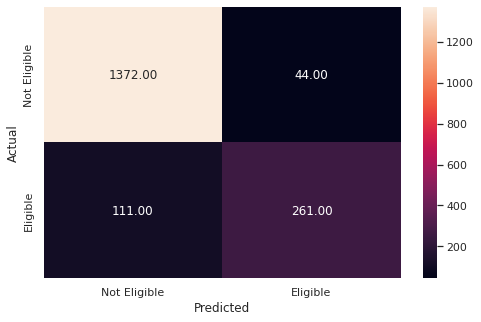

In [76]:
# Checking performance on the test data
pred_test_4 = rf_estimator.predict(x_test)

metrics_score(y_test, pred_test_4)


**Observations: __________**

* The proformance on the training is a 100% random forest result.
* We can still observe that it may has an overfitting on the data.
* Random forest are very efficient on the training data with a recall of 1.00.

### **Build a Random Forest model with Class Weights**

In [77]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator_w = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Fitting Random Forest model
rf_estimator_w.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



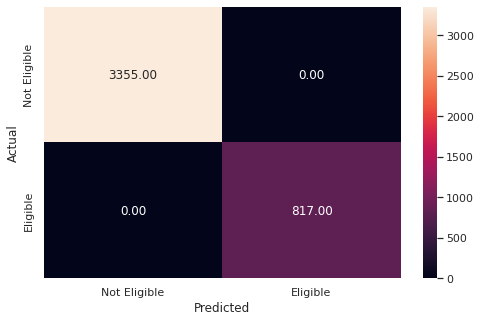

In [78]:
# Checking performance on the train data
pred_train_5 = rf_estimator_w.predict(x_train)

metrics_score(y_train, pred_train_5)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1416
           1       0.86      0.67      0.75       372

    accuracy                           0.91      1788
   macro avg       0.89      0.82      0.85      1788
weighted avg       0.90      0.91      0.90      1788



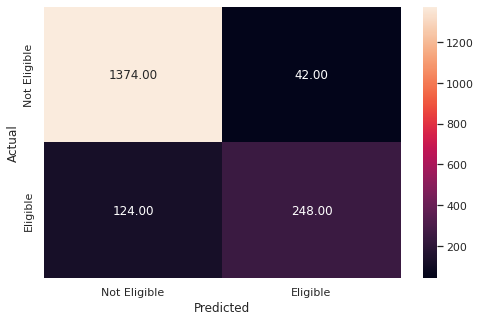

In [79]:
# Checking performance on the test data
pred_test_5 = rf_estimator_w.predict(x_test)

metrics_score(y_test, pred_test_5)

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [80]:
# Choose the type of classifier. 
# Remove _________ and complete the code
rf_estimator_tuned = RandomForestClassifier(class_weight = {0:0.2, 1:0.8}, random_state = 1, oob_score = True, bootstrap = True)


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_features': ['sqrt', 'log2', None, 0.65],
              'min_samples_leaf': np.arange(1, 15, 5),
              'min_samples_split': np.arange(2, 20, 5),
              "n_estimators": np.arange(10, 110, 10)}


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = 'recall', cv = 5, n_jobs = -1)


#fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(x_train, y_train)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
rf_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_features='log2',
                       min_samples_leaf=11, n_estimators=10, oob_score=True,
                       random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3355
           1       0.68      0.87      0.76       817

    accuracy                           0.89      4172
   macro avg       0.82      0.88      0.85      4172
weighted avg       0.91      0.89      0.90      4172



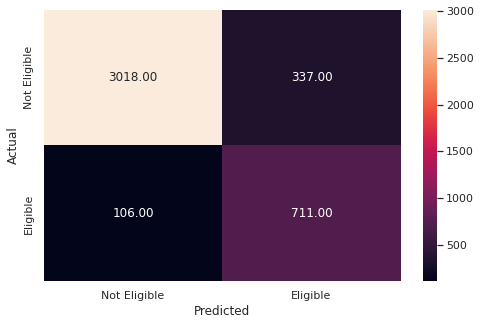

In [81]:
# Checking performance on the training data
pred_train_6 = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, pred_train_6)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1416
           1       0.67      0.78      0.72       372

    accuracy                           0.87      1788
   macro avg       0.80      0.84      0.82      1788
weighted avg       0.88      0.87      0.88      1788



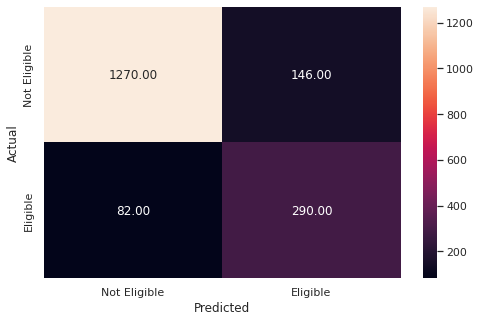

In [82]:
# Checking performace on test dataset
pred_test_6 = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, pred_test_6)

**Insights: _____**

* There are 75% of cases were predicted to be positive.
* The precision isn't high enough.


#### Plot the Feature importance of the tuned Random Forest

In [83]:
print(pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                      Imp
DEBTINC_missing_values_flag  2.968388e-01
DEBTINC                      2.291707e-01
DELINQ                       8.539110e-02
CLAGE                        6.876736e-02
DEROG                        5.287720e-02
MORTDUE                      4.935974e-02
VALUE                        4.339690e-02
LOAN                         4.094592e-02
CLNO                         3.787666e-02
YOJ                          2.192822e-02
NINQ                         1.589440e-02
VALUE_missing_values_flag    1.382558e-02
JOB_Office                   7.051689e-03
JOB_Other                    5.562988e-03
JOB_ProfExe                  5.148916e-03
DEROG_missing_values_flag    4.896691e-03
JOB_Sales                    4.183417e-03
YOJ_missing_values_flag      3.589011e-03
REASON_HomeImp               3.356679e-03
JOB_missing_values_flag      2.542404e-03
CLAGE_missing_values_flag    2.467505e-03
DELINQ_missing_values_flag   2.282583e-03
NINQ_missing_values_flag     1.016

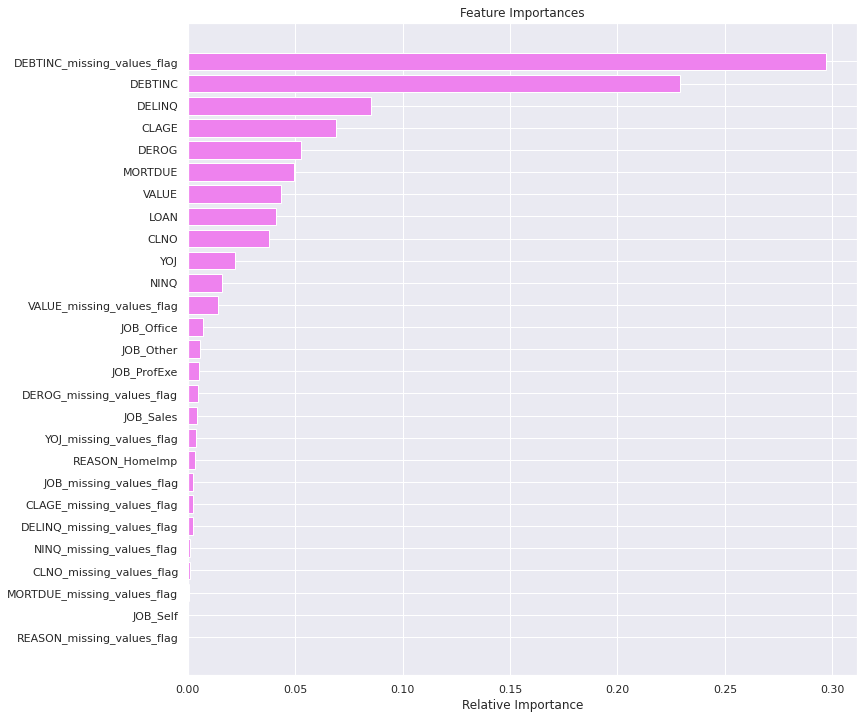

In [84]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = x_train.columns

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

### **Comparing Model Performances**|

In [85]:
def get_recall_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [86]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [87]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=x_train,X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [90]:
# Make the list of all the model names 

models = [logreg, d_tree, d_tree_tuned, rf_estimator, rf_estimator_w, rf_estimator_tuned]
# Remove _________ and complete the code

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [91]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
# Remove _________ and complete the code

comparison_frame = pd.DataFrame({'Model':['Logistic Regression', 'Logistic Regression Decision Tree', 'Tuned Decision Tree', 
                                          'Random Forest', 'Weighted Random Forest', 'Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.875120,0.872483,0.609547,0.567204,0.711429,0.758993
1,Logistic Regression Decision Tree,1.000000,0.860738,1.000000,0.610215,1.000000,0.685801
2,Tuned Decision Tree,0.854027,0.843400,0.828641,0.790323,0.590750,0.592742
3,Random Forest,1.000000,0.913311,1.000000,0.701613,1.000000,0.855738
4,Weighted Random Forest,1.000000,0.907159,1.000000,0.666667,1.000000,0.855172
5,Tuned Random Forest,0.893816,0.872483,0.870257,0.779570,0.678435,0.665138
